In [2]:

from google.colab import files
uploaded = files.upload()

ModuleNotFoundError: No module named 'google.colab'

In [3]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns


# PRÉ-PROCESSAMENTO



Limpeza

In [9]:
df = pd.read_excel("Dataset.xlsx")

In [10]:
df.head()

,Matrícula,Data de Nascimento,Semestre,Curso,Disciplinas,Av1,Av2,FALTA,Tipo de Ingresso,BOLSA,...,Raça,Bairro,Distancia,Estado Civil,Você trabalha? (Estágio ou Efetivo),Renda Própria,Quantidade de Filhos,Renda do Responsável Financeiro,Escolaridade do Responsável,Status
0,-,-,-,Arquitetura e Urbanismo,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,1
1,-,-,-,Arquitetura e Urbanismo,IDP INTERSHIP,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,1
2,-,-,-,Arquitetura e Urbanismo,TEORIA E HISTÓRIA II,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,1
3,-,-,-,Arquitetura e Urbanismo,TOPOGRAFIA,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,1
4,12,2002-09-13 00:00:00.000,2/2022,Jornalismo,CULTURA DIGITAL E CONTEMPORANEIDADE,4.5000,0.0000,19.0000,VESTIBULAR/PROCESSO SELETIVO,Desconto Comercial,...,-,-,-,-,-,-,-,-,-,1


In [11]:
df = df.drop('Matrícula', axis=1)

# status 0 = cursando
# status 1 - evadido

In [12]:
df.replace("-", np.nan, inplace=True)
df = df.dropna()

/var/folders/c_/b82dq82x4bzgqmw63c0ksglr0000gn/T/ipykernel_27159/2256635397.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace("-", np.nan, inplace=True)


In [13]:
df.head()

,Data de Nascimento,Semestre,Curso,Disciplinas,Av1,Av2,FALTA,Tipo de Ingresso,BOLSA,%_BOLSA,...,Raça,Bairro,Distancia,Estado Civil,Você trabalha? (Estágio ou Efetivo),Renda Própria,Quantidade de Filhos,Renda do Responsável Financeiro,Escolaridade do Responsável,Status
1461,1995-02-18 00:00:00,2/2022,Jornalismo,CULTURA DIGITAL E CONTEMPORANEIDADE,6.2000,9.5000,16.0000,PORTADOR DE DIPLOMA,Desconto Comercial,100.0000,...,Pardo,Jardim Botânico,21.9,Solteiro(a),Sim,Até R$ 1.000,0.0,R$ 10.001 a R$ 15.000,Pós-Graduação,0
1462,1995-02-18 00:00:00,2/2022,Publicidade e Propaganda,CULTURA DIGITAL E CONTEMPORANEIDADE,6.2000,9.5000,16.0000,PORTADOR DE DIPLOMA,Desconto Comercial,100.0000,...,Pardo,Jardim Botânico,21.9,Solteiro(a),Sim,Até R$ 1.000,0.0,R$ 10.001 a R$ 15.000,Pós-Graduação,0
1463,1995-02-18 00:00:00,1/2021,Jornalismo,INTRODUÇÃO À FOTOGRAFIA,6.3000,7.0000,0.0000,PORTADOR DE DIPLOMA,Bolsa Institucional,100.0000,...,Pardo,Jardim Botânico,21.9,Solteiro(a),Sim,Até R$ 1.000,0.0,R$ 10.001 a R$ 15.000,Pós-Graduação,0
1464,1995-02-18 00:00:00,1/2021,Publicidade e Propaganda,INTRODUÇÃO À FOTOGRAFIA,6.3000,7.0000,0.0000,PORTADOR DE DIPLOMA,Bolsa Institucional,100.0000,...,Pardo,Jardim Botânico,21.9,Solteiro(a),Sim,Até R$ 1.000,0.0,R$ 10.001 a R$ 15.000,Pós-Graduação,0
1465,1995-02-18 00:00:00,1/2023,Publicidade e Propaganda,COMPORTAMENTO DO CONSUMIDOR,7.0000,6.0000,18.0000,PORTADOR DE DIPLOMA,Desconto Comercial,100.0000,...,Pardo,Jardim Botânico,21.9,Solteiro(a),Sim,Até R$ 1.000,0.0,R$ 10.001 a R$ 15.000,Pós-Graduação,0


In [15]:
df['Data de Nascimento'] = pd.to_datetime(df['Data de Nascimento'], format='%Y-%m-%d')

# Função para calcular a idade
def calcular_idade(data_nascimento):
    hoje = datetime.now()
    idade = hoje.year - data_nascimento.year - ((hoje.month, hoje.day) < (data_nascimento.month, data_nascimento.day))
    return idade

# Aplicar a função para calcular a idade
df['Idade'] = df['Data de Nascimento'].apply(calcular_idade)

# Agora, você pode remover a coluna 'Data de Nascimento' se desejar
df = df.drop('Data de Nascimento', axis=1)

print(df)

     Semestre                     Curso  \
1461   2/2022                Jornalismo   
1462   2/2022  Publicidade e Propaganda   
1463   1/2021                Jornalismo   
1464   1/2021  Publicidade e Propaganda   
1465   1/2023  Publicidade e Propaganda   
...       ...                       ...   
3883   1/2023  Publicidade e Propaganda   
3884   1/2023             Administração   
3885   1/2023    Administração;Economia   
3886   1/2023     Ciência da Computação   
3887   1/2023                  Economia   

                                            Disciplinas      Av1      Av2  \
1461                CULTURA DIGITAL E CONTEMPORANEIDADE   6.2000   9.5000   
1462                CULTURA DIGITAL E CONTEMPORANEIDADE   6.2000   9.5000   
1463                            INTRODUÇÃO À FOTOGRAFIA   6.3000   7.0000   
1464                            INTRODUÇÃO À FOTOGRAFIA   6.3000   7.0000   
1465                        COMPORTAMENTO DO CONSUMIDOR   7.0000   6.0000   
...                  

In [16]:

df['Av1'] = pd.to_numeric(df['Av1'], errors='coerce')
df['Av2'] = pd.to_numeric(df['Av2'], errors='coerce')
df['FALTA'] = pd.to_numeric(df['FALTA'], errors='coerce')
df['%_BOLSA'] = pd.to_numeric(df['%_BOLSA'], errors='coerce')

In [17]:
df.head()

,Semestre,Curso,Disciplinas,Av1,Av2,FALTA,Tipo de Ingresso,BOLSA,%_BOLSA,SITUACAO,...,Bairro,Distancia,Estado Civil,Você trabalha? (Estágio ou Efetivo),Renda Própria,Quantidade de Filhos,Renda do Responsável Financeiro,Escolaridade do Responsável,Status,Idade
1461,2/2022,Jornalismo,CULTURA DIGITAL E CONTEMPORANEIDADE,6.2,9.5,16.0,PORTADOR DE DIPLOMA,Desconto Comercial,100.0,MATRICULADO,...,Jardim Botânico,21.9,Solteiro(a),Sim,Até R$ 1.000,0.0,R$ 10.001 a R$ 15.000,Pós-Graduação,0,29
1462,2/2022,Publicidade e Propaganda,CULTURA DIGITAL E CONTEMPORANEIDADE,6.2,9.5,16.0,PORTADOR DE DIPLOMA,Desconto Comercial,100.0,MATRICULADO,...,Jardim Botânico,21.9,Solteiro(a),Sim,Até R$ 1.000,0.0,R$ 10.001 a R$ 15.000,Pós-Graduação,0,29
1463,1/2021,Jornalismo,INTRODUÇÃO À FOTOGRAFIA,6.3,7.0,0.0,PORTADOR DE DIPLOMA,Bolsa Institucional,100.0,MATRICULADO,...,Jardim Botânico,21.9,Solteiro(a),Sim,Até R$ 1.000,0.0,R$ 10.001 a R$ 15.000,Pós-Graduação,0,29
1464,1/2021,Publicidade e Propaganda,INTRODUÇÃO À FOTOGRAFIA,6.3,7.0,0.0,PORTADOR DE DIPLOMA,Bolsa Institucional,100.0,MATRICULADO,...,Jardim Botânico,21.9,Solteiro(a),Sim,Até R$ 1.000,0.0,R$ 10.001 a R$ 15.000,Pós-Graduação,0,29
1465,1/2023,Publicidade e Propaganda,COMPORTAMENTO DO CONSUMIDOR,7.0,6.0,18.0,PORTADOR DE DIPLOMA,Desconto Comercial,100.0,MATRICULADO,...,Jardim Botânico,21.9,Solteiro(a),Sim,Até R$ 1.000,0.0,R$ 10.001 a R$ 15.000,Pós-Graduação,0,29


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1953 entries, 1461 to 3887
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Semestre                             1953 non-null   object 
 1   Curso                                1953 non-null   object 
 2   Disciplinas                          1953 non-null   object 
 3   Av1                                  1953 non-null   float64
 4   Av2                                  1953 non-null   float64
 5   FALTA                                1953 non-null   float64
 6   Tipo de Ingresso                     1953 non-null   object 
 7   BOLSA                                1953 non-null   object 
 8   %_BOLSA                              1953 non-null   float64
 9   SITUACAO                             1953 non-null   object 
 10  Semestre presente                    1953 non-null   object 
 11  Sexo                            

In [19]:
df_limpo = df

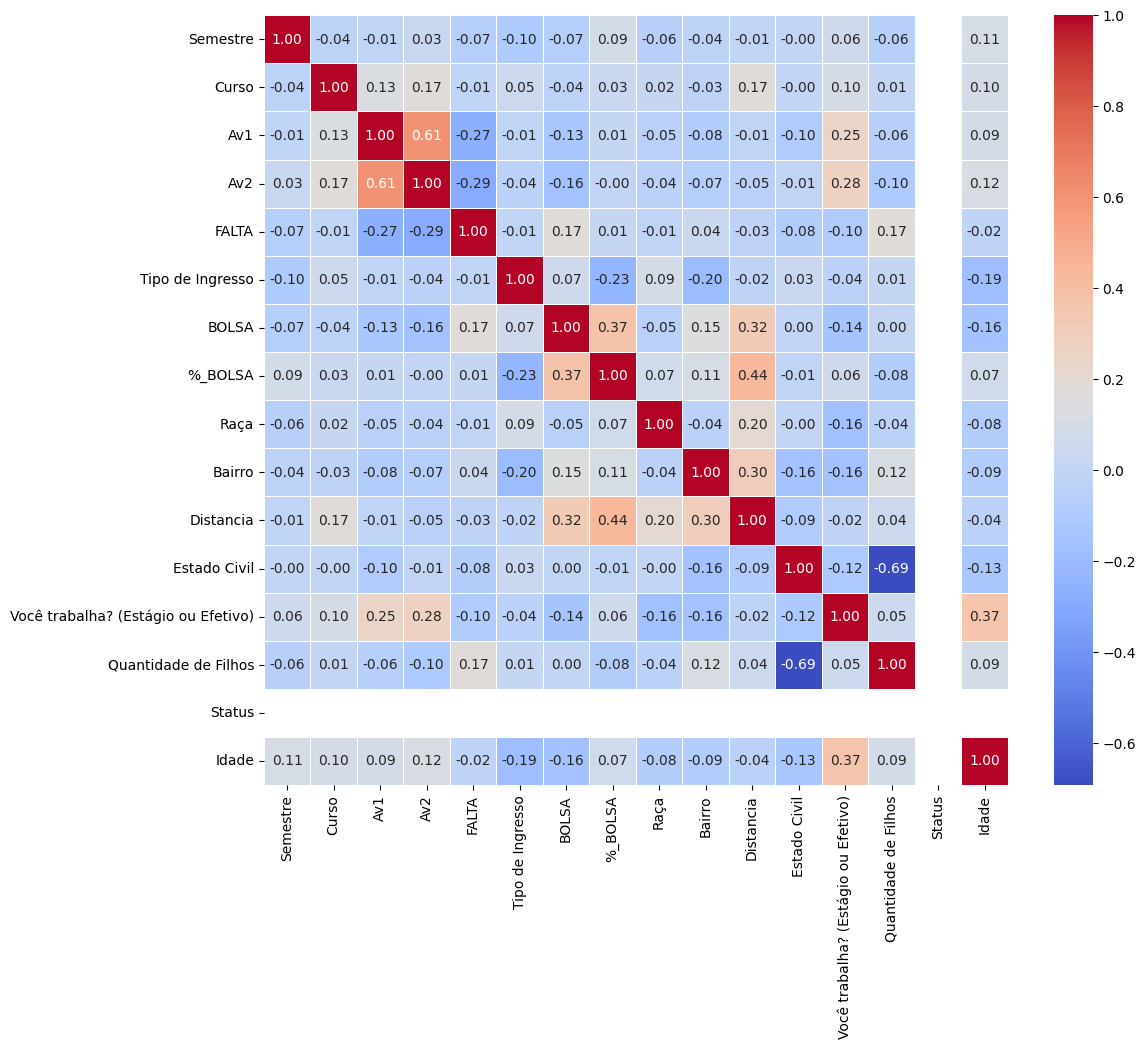

In [23]:
# Verificar se 'Semestre', 'Distancia' e '%_BOLSA' são strings, caso contrário, convertê-los
df['Semestre'] = df['Semestre'].astype(str).str.extract('(\d+)').astype(int)
df['Distancia'] = df['Distancia'].astype(str).str.replace(',', '.').astype(float)
df['%_BOLSA'] = df['%_BOLSA'].astype(str).str.replace('%', '').astype(float)

# Certifique-se de converter todas as colunas categóricas restantes para numéricas
df['Curso'] = df['Curso'].astype('category').cat.codes
df['Tipo de Ingresso'] = df['Tipo de Ingresso'].astype('category').cat.codes
df['BOLSA'] = df['BOLSA'].astype('category').cat.codes
df['Raça'] = df['Raça'].astype('category').cat.codes
df['Bairro'] = df['Bairro'].astype('category').cat.codes
df['Estado Civil'] = df['Estado Civil'].astype('category').cat.codes
df['Você trabalha? (Estágio ou Efetivo)'] = df['Você trabalha? (Estágio ou Efetivo)'].astype('category').cat.codes

# Selecionar apenas colunas numéricas para a correlação
df_limpo = df.select_dtypes(include=[np.number])

# Calcular a matriz de correlação
correlacao = df_limpo.corr()

# Criar um mapa de calor da matriz de correlação
plt.figure(figsize=(12, 10))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.show()


In [24]:
df_limpo

,Semestre,Curso,Av1,Av2,FALTA,Tipo de Ingresso,BOLSA,%_BOLSA,Raça,Bairro,Distancia,Estado Civil,Você trabalha? (Estágio ou Efetivo),Quantidade de Filhos,Status,Idade
1461,2,7,6.2,9.5,16.0,1,7,100.0,2,8,21.9,1,1,0.0,0,29
1462,2,8,6.2,9.5,16.0,1,7,100.0,2,8,21.9,1,1,0.0,0,29
1463,1,7,6.3,7.0,0.0,1,1,100.0,2,8,21.9,1,1,0.0,0,29
1464,1,8,6.3,7.0,0.0,1,1,100.0,2,8,21.9,1,1,0.0,0,29
1465,1,8,7.0,6.0,18.0,1,7,100.0,2,8,21.9,1,1,0.0,0,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3883,1,8,10.0,9.7,2.0,0,7,50.0,0,7,18.2,1,0,0.0,0,19
3884,1,0,10.0,10.0,8.0,0,7,50.0,0,7,18.2,1,0,0.0,0,19
3885,1,1,10.0,10.0,8.0,0,7,50.0,0,7,18.2,1,0,0.0,0,19
3886,1,3,10.0,10.0,8.0,0,7,50.0,0,7,18.2,1,0,0.0,0,19


# CATEGORIZAÇÃO


In [25]:
df = pd.get_dummies(df, columns=[ 'Semestre', 'Curso', 'Disciplinas', 'Tipo de Ingresso'], drop_first=True)

In [26]:
df = pd.get_dummies(df)

In [27]:
df.head()

,Av1,Av2,FALTA,BOLSA,%_BOLSA,Raça,Bairro,Distancia,Estado Civil,Você trabalha? (Estágio ou Efetivo),...,Renda do Responsável Financeiro_R$ 3.001 a R$ 5.000,Renda do Responsável Financeiro_R$ 5.001 a R$ 7.000,Renda do Responsável Financeiro_R$ 7.001 a R$ 10.000,Renda do Responsável Financeiro_R$ 7.001 a R$ 10.000;R$ 10.001 a R$ 15.000,Escolaridade do Responsável_Doutorado,Escolaridade do Responsável_Ensino Fundamental,Escolaridade do Responsável_Ensino Médio,Escolaridade do Responsável_Ensino Superior,Escolaridade do Responsável_Mestrado,Escolaridade do Responsável_Pós-Graduação
1461,6.2,9.5,16.0,7,100.0,2,8,21.9,1,1,...,False,False,False,False,False,False,False,False,False,True
1462,6.2,9.5,16.0,7,100.0,2,8,21.9,1,1,...,False,False,False,False,False,False,False,False,False,True
1463,6.3,7.0,0.0,1,100.0,2,8,21.9,1,1,...,False,False,False,False,False,False,False,False,False,True
1464,6.3,7.0,0.0,1,100.0,2,8,21.9,1,1,...,False,False,False,False,False,False,False,False,False,True
1465,7.0,6.0,18.0,7,100.0,2,8,21.9,1,1,...,False,False,False,False,False,False,False,False,False,True


In [28]:
# Separando os recursos (X) e o rótulo (y)
X = df.drop('Status', axis=1)  # Features
y = df['Status']  # Rótulo

# TREINAMENTO

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)


In [30]:
# Criando o modelo de árvore de decisão
modelo = DecisionTreeClassifier(max_depth=4, random_state=25)


In [31]:
modelo.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=25)

In [32]:
y_pred = modelo.predict(X_test)

In [33]:
acuracia = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {acuracia:.2f}')

Acurácia do modelo: 1.00


In [34]:
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusão:')
print(conf_matrix)


Matriz de Confusão:
[[391]]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:395: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       391

    accuracy                           1.00       391
   macro avg       1.00      1.00      1.00       391
weighted avg       1.00      1.00      1.00       391



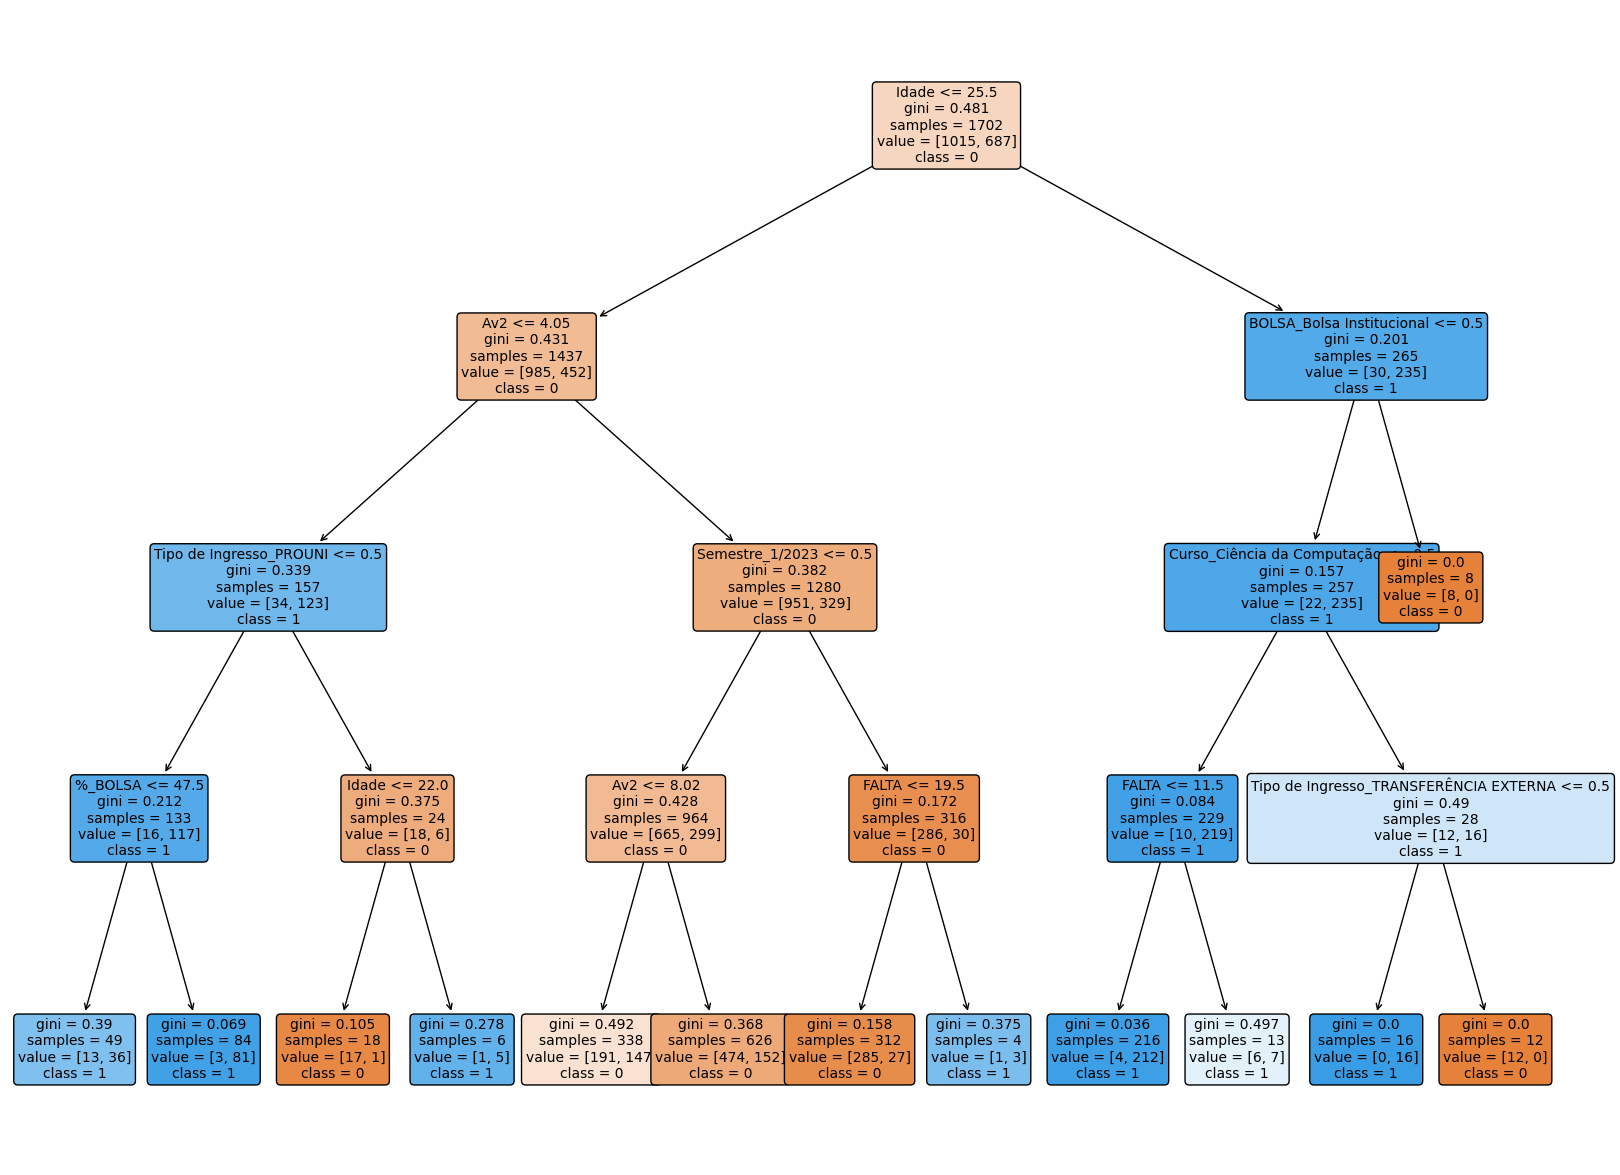

In [ ]:
plt.figure(figsize=(20, 15))  # Ajuste o tamanho total da figura
plot_tree(modelo, filled=True, feature_names=X.columns, class_names=['0', '1'], rounded=True, fontsize=10)  # Ajuste o tamanho da fonte
plt.show()

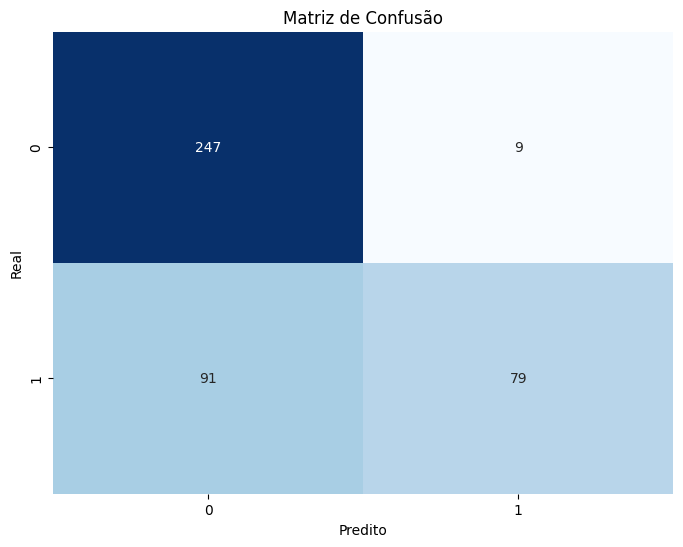

In [ ]:
# Visualizar a matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=modelo.classes_, yticklabels=modelo.classes_)
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

In [ ]:
print(matriz_confusao)

[[247   9]
 [ 91  79]]


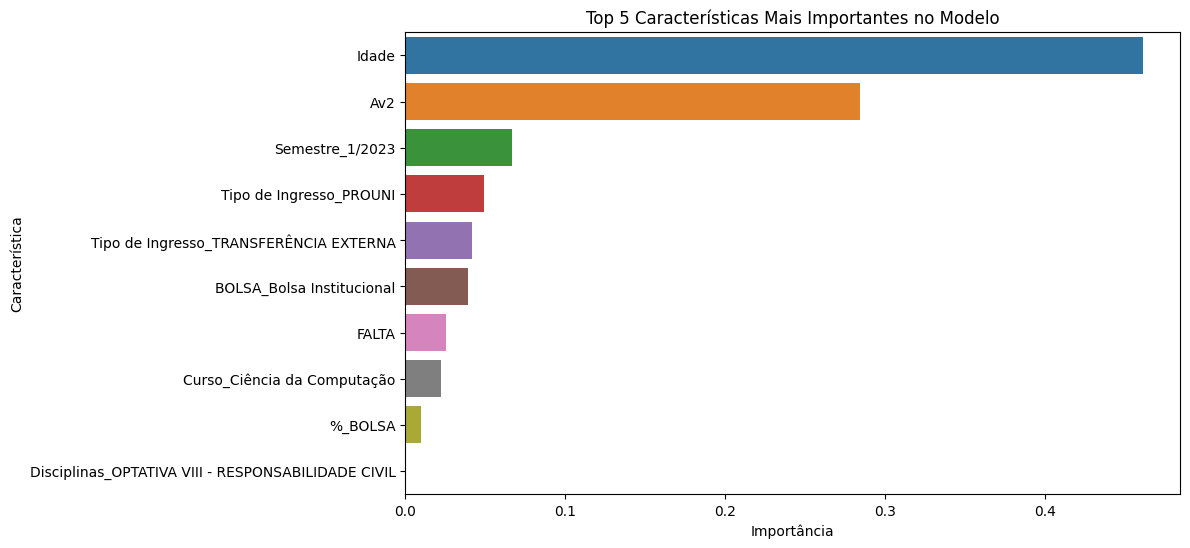

In [ ]:
# Crie um gráfico de barras mostrando apenas as top 5 características
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10))
plt.title('Top 5 Características Mais Importantes no Modelo')
plt.xlabel('Importância')
plt.ylabel('Característica')
plt.show()


In [ ]:
importances = modelo.feature_importances_
feature_names = X.columns

feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print(feature_importances.head(10))


                                               Feature  Importance
4                                                Idade    0.461258
1                                                  Av2    0.284391
8                                      Semestre_1/2023    0.066918
185                            Tipo de Ingresso_PROUNI    0.048935
186             Tipo de Ingresso_TRANSFERÊNCIA EXTERNA    0.041623
190                          BOLSA_Bolsa Institucional    0.039376
2                                                FALTA    0.025160
15                         Curso_Ciência da Computação    0.022436
3                                              %_BOLSA    0.009902
135  Disciplinas_OPTATIVA VIII - RESPONSABILIDADE C...    0.000000
